# **import libraries**

In [1]:
# Necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# For matrix factorization
from scipy.sparse.linalg import svds

# **Read Data**

In [2]:
# Load ratings dataset
rating = pd.read_csv('data/ratings.csv')
# Load movies dataset
movie = pd.read_csv('data/movies.csv')
# Merge two datasets to have better picture
df = pd.merge(rating, movie, on='movieId')

In [3]:
# Check if any NaN values
print(df.isnull().sum())
print("----------------------")
# print shape
print(df.shape)
#print head
df.head()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64
----------------------
(100836, 6)


,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


# **Exploratory Data Analysis**


In [4]:
eda_rating = pd.DataFrame(df.groupby('title')['rating'].mean())
eda_rating['count of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
eda_rating.head()

,rating,count of ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


In [5]:
to_be_drawn = eda_rating.sort_values('count of ratings', ascending=False).head(10)
to_be_drawn

,rating,count of ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


<BarContainer object of 10 artists>

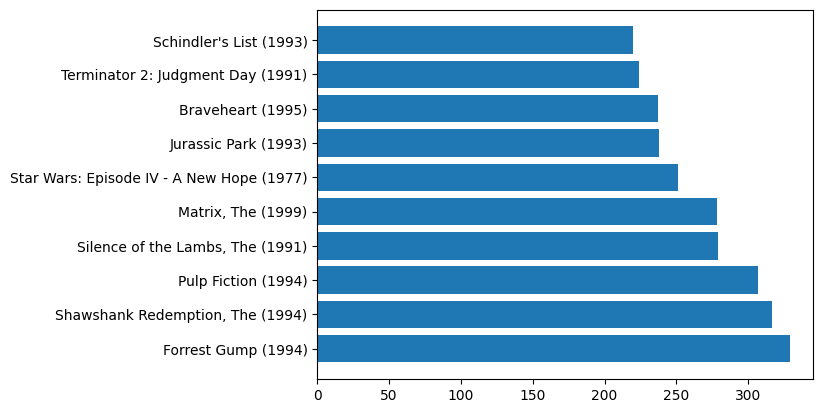

In [6]:
plt.barh(to_be_drawn.index,to_be_drawn['count of ratings'])

In [7]:
eda_rating.sort_values('rating', ascending=False).head(10)
# movies of high rating i.e 5 , seems to have low count of ratings

,rating,count of ratings
title,,
Gena the Crocodile (1969),5.0,1
True Stories (1986),5.0,1
Cosmic Scrat-tastrophe (2015),5.0,1
Love and Pigeons (1985),5.0,1
Red Sorghum (Hong gao liang) (1987),5.0,1
"Thin Line Between Love and Hate, A (1996)",5.0,1
Lesson Faust (1994),5.0,2
Eva (2011),5.0,1
Who Killed Chea Vichea? (2010),5.0,1


In [8]:
eda_rating.sort_values(['count of ratings','rating'], ascending=False).head(10)

,rating,count of ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


# **User Recommender**

## **Matrix Factorization**

In [54]:
utility_matrix = df.pivot(index='userId', columns='movieId',values='rating')
utility_matrix = utility_matrix.fillna(0)
utility_matrix

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,2.5,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
utility_matrix=utility_matrix.reset_index()
utility_matrix

movieId,userId,1,2,3,4,5,6,7,8,9,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
0,1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,606,2.5,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
606,607,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,608,2.5,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,609,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
utility_matrix.to_csv("./data/utility_matrix.csv",index=False)
# user_idx = np.where(utility_matrix.index == 0)[0][0]
# user_idx

In [50]:
utility_matrix_n=pd.read_csv("./data/utility_matrix.csv",index_col="userId")
utility_matrix_n

,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,2.5,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
k=3

no_of_users = utility_matrix.shape[0]
no_of_items = utility_matrix.shape[1]

U_random = np.random.random((no_of_users, k))
M_random = np.random.random((k, no_of_items))

In [40]:
def matrix_factorization(R: np.ndarray, U: np.ndarray, M: np.ndarray, epochs: int, lr: float, beta: float):
    """
    Function Parameters:
    - `R`: Utility Matrix [of shape: `(no. of users, no. of items)`]
    - `U`: User Latent Features Array [of shape: `(no. of users, K)`]
    - `M`: Items Latent Features Array [of shape: `(K, no. of items)`]
    - `epochs`: No. of training epochs
    - `lr`: Learning rate (alpha)
    - `beta`: Regularization Parameter

    Function Output:
    - `U`: Optimized User Latent Features Array
    - `M`: Optimized Items Latent Features Array
    """
    U = U.copy()
    M = M.copy()
    
    # Confirm that no. of features is consistent between U and M
    assert U.shape[1] == M.shape[0], f'U and M must have consistent K. Found K={U.shape[1]} for U and K={M.shape[0]} for M'

    # Extract No. of Features (K)
    K = M.shape[0]

    # Define the Epochs loop
    for epoch in range(epochs):
        # Loop over every element in R
        for i in range(U.shape[0]): # Loop over each user
            for j in range(M.shape[1]): # Loop over each item
                if R[i,j] !=0: # Only proceed if the current interaction (i, j) is not missing
                    eij =  R[i,j] - (U[i] @ M.T[j])  # Calculate the error in prediction
                    for d in range(K): # Loop over each latent features dimension
                        # Update Rules for both U and M:
                        U[i, d] = U[i, d] + lr*(2*eij*M[d, j] - beta * U[i, d])
                        M[d, j] = M[d, j] + lr*(2*eij*U[i, d] - beta * M[d, j])

        ## Error Calculation ##
        e_last = e if epoch > 0 else 100000000
        e = 0 # Initialize a variable to accumelate the errors
        for i in range(U.shape[0]): # Loop over each user
            for j in range(M.shape[1]): # Loop over each item
                if R[i,j] !=0: # Only proceed if the current interaction (i, j) is not missing
                                # since we only calculate the error for interactions having a ground truth value

                    first_part =(U[i] @ M.T[j] - R[i,j]) ** 2  # calculate the first part of the error
                    second_part = 0 # Initialize a variable to accumelate the second part of the error

                    for d in range(K): # Loop over each latent features dimension
                        second_part += ((beta / 2) * (U[i,d] ** 2 + M[d,j] ** 2))

                    e += first_part + second_part # accumelate the error to the total error
                
        print(f'Epoch {epoch+1}/{epochs}: Total Error = {e}')

        if e < 0.001 or e_last-e < 0.001: # Stop if error is so small or improvement is not significant
            break
    return U, M


In [41]:
U_1, M_1 = matrix_factorization(R=utility_matrix.values, U=U_random, M=M_random, epochs=50, lr=0.01, beta=0.001)

Epoch 1/50: Total Error = 444663.3532785856
Epoch 2/50: Total Error = 111657.34512976176
Epoch 3/50: Total Error = 93130.30964866265
Epoch 4/50: Total Error = 85504.65055490218
Epoch 5/50: Total Error = 81052.35931966985
Epoch 6/50: Total Error = 77992.68431568798
Epoch 7/50: Total Error = 75670.48042579321
Epoch 8/50: Total Error = 73794.27639137873
Epoch 9/50: Total Error = 72218.70752238322
Epoch 10/50: Total Error = 70863.30895101107
Epoch 11/50: Total Error = 69679.05267063873
Epoch 12/50: Total Error = 68633.58424986838
Epoch 13/50: Total Error = 67703.92789896368
Epoch 14/50: Total Error = 66872.64799415848
Epoch 15/50: Total Error = 66125.88271629065
Epoch 16/50: Total Error = 65452.34162623925
Epoch 17/50: Total Error = 64842.72224155173
Epoch 18/50: Total Error = 64289.292158733646
Epoch 19/50: Total Error = 63785.55362193178
Epoch 20/50: Total Error = 63325.97251912145
Epoch 21/50: Total Error = 62905.76789017715
Epoch 22/50: Total Error = 62520.75701732469
Epoch 23/50: Tota

In [42]:
def recommend_movies(user_id, utility_matrix, U_1, M_1, K):
    # Find the index of the user_id in the U matrix
    user_ids = utility_matrix.index
    user_idx = np.where(user_ids == user_id)[0][0]

    # Compute predicted ratings for the user_id
    predicted_ratings = np.dot(U_1[user_idx], M_1)

    # Find the indices of already rated items
    rated_items = np.nonzero(utility_matrix.loc[user_id].values)[0]

    # Set predicted ratings of already rated items to -1 (to exclude them from top-K recommendations)
    predicted_ratings[rated_items] = -1

    # Get the indices and values of top-K items
    top_K_item_ids = np.argsort(predicted_ratings)[-K:][::-1]
    top_K_item_ratings = np.sort(predicted_ratings)[-K:][::-1]

    recommendations = []
    for id, rating in zip(utility_matrix.columns[top_K_item_ids], top_K_item_ratings):
        recommendations.append((id, rating))

    return recommendations


In [51]:
recommended_movies = recommend_movies(3, utility_matrix, U_1, M_1, 20)
for i, (movie_id, rate) in enumerate(recommended_movies):
    print(f"Recommendation {i+1}: Movie {movie_id} (Predicted Rating: {rating})")

Recommendation 1: Movie 535 (Predicted Rating: 6.882180490752149)
Recommendation 2: Movie 2492 (Predicted Rating: 6.882180490752149)
Recommendation 3: Movie 56145 (Predicted Rating: 6.882180490752149)
Recommendation 4: Movie 71057 (Predicted Rating: 6.882180490752149)
Recommendation 5: Movie 1011 (Predicted Rating: 6.882180490752149)
Recommendation 6: Movie 3272 (Predicted Rating: 6.882180490752149)
Recommendation 7: Movie 3054 (Predicted Rating: 6.882180490752149)
Recommendation 8: Movie 3099 (Predicted Rating: 6.882180490752149)
Recommendation 9: Movie 2720 (Predicted Rating: 6.882180490752149)
Recommendation 10: Movie 120635 (Predicted Rating: 6.882180490752149)
Recommendation 11: Movie 71530 (Predicted Rating: 6.882180490752149)
Recommendation 12: Movie 611 (Predicted Rating: 6.882180490752149)
Recommendation 13: Movie 71379 (Predicted Rating: 6.882180490752149)
Recommendation 14: Movie 8640 (Predicted Rating: 6.882180490752149)
Recommendation 15: Movie 934 (Predicted Rating: 6.882

## **Matrix Factorization with SVD**

In [3]:
from surprise.reader import Reader
from surprise.dataset import Dataset
from surprise.model_selection import train_test_split
from surprise.prediction_algorithms.matrix_factorization import SVD
from surprise.accuracy import rmse,mse,mae
from surprise.dump import dump,load

In [12]:
rating.drop('timestamp',axis=1,inplace=True)

In [13]:
reader = Reader()
dataset = Dataset.load_from_df(rating, reader)

In [14]:
train_data, test_data = train_test_split(dataset, test_size=0.15)

In [15]:
# Biased Model
# 100 factors and 20 iterations as default
model_1= SVD()

model_1.fit(train_data)

In [16]:
# Biased Model
predictions_1 = model_1.test(test_data)
print(rmse(predictions_1))
print(mse(predictions_1))
print(mae(predictions_1))

RMSE: 0.8682
0.8682020971715303
MSE: 0.7538
0.7537748815330434
MAE:  0.6644
0.6643631274327026


In [17]:
model_1.predict(uid=533.0,iid=93840.0)

Prediction(uid=533.0, iid=93840.0, r_ui=None, est=4.519291827702358, details={'was_impossible': False})

In [18]:
users_1 = np.array([item.uid for item in predictions_1]).reshape(-1,1)
items_1 = np.array([item.iid for item in predictions_1]).reshape(-1,1)
real_1 = np.array([item.r_ui for item in predictions_1]).reshape(-1,1)
predicted_1 = np.array([item.est for item in predictions_1]).reshape(-1,1)

modified_predicted_1 = np.concatenate([users_1,items_1,real_1,predicted_1],axis=1)

In [19]:
df_biased = pd.DataFrame(modified_predicted_1,columns=['UserID','MovieID','real_rating','Predicted_rating'])
#df_biased.drop(columns=['UserID'],inplace=True)
df_biased_sorted = df_biased.sort_values('Predicted_rating', ascending=False)

In [20]:
df_biased

,UserID,MovieID,real_rating,Predicted_rating
0,275.0,1228.0,5.0,4.616107
1,307.0,3147.0,4.0,3.638680
2,187.0,70.0,4.0,3.542531
3,477.0,750.0,5.0,4.392048
4,368.0,2302.0,3.0,2.713096
...,...,...,...,...
15121,75.0,592.0,3.5,2.931782
15122,380.0,608.0,4.0,4.599389
15123,594.0,7031.0,4.0,3.941438
15124,599.0,2115.0,3.5,3.037443


In [55]:
def roundd(rating):
    if rating - int(rating) > 0.75:
        rating = int(rating) + 1
    elif rating - int(rating) < 0.75 and (rating - int(rating) > 0.5) :
        rating = int(rating) + 0.5
    elif rating - int(rating) > 0.25 and (rating - int(rating) < 0.5) :
        rating=int(rating) + 0.5
    elif rating - int(rating) < 0.25:
        rating = int(rating)
    else:
        rating = int(rating)
    return rating

In [56]:
def recommend_top_movies(user_id,modified_predicted,K):
    # Filter the dataframe based on the user ID
    df_filtered = modified_predicted.loc[modified_predicted['UserID'] == user_id]
    # Sort the filtered dataframe by predicted rating in descending order
    df_sorted = df_filtered.sort_values('Predicted_rating', ascending=False)
    
    df_sorted['Predicted_rating'] = df_sorted['Predicted_rating'].apply(roundd)
    # Get the top-K movie IDs
    top_K_movie_ids = df_sorted['MovieID'].head(K).tolist()
    top_K_movie_predicted_rating = df_sorted['Predicted_rating'].head(K).tolist()
    
    top_K_movies = [(id,rating) for id,rating in zip(top_K_movie_ids,top_K_movie_predicted_rating)]
    return top_K_movies

In [57]:
# Example usage
user_id = 34
K = 10
top_movies = recommend_top_movies(user_id, df_biased_sorted, K)
print(f"Top-{K} recommended movies for User {user_id}:")
for i, tuple in enumerate(top_movies):
    print(f"\t- Top {i+1} Movie: {tuple[0]}, rating: {tuple[1]}")

NameError: name 'df_biased_sorted' is not defined

### **PREDICTION FUNCTION**

In [24]:
dump('svd',algo=model_1, verbose=0)

In [25]:
predictions, algo = load('svd')

In [26]:
algo.predict(uid=533.0,iid=93840.0)

Prediction(uid=533.0, iid=93840.0, r_ui=None, est=4.519291827702358, details={'was_impossible': False})

In [60]:
def recommend_top_k_movies(utility_matrix,user_id,K=20):
    predictions, algo = load('./models/svd')
    #algo = algorithm
    user_idx = np.where(utility_matrix.index == user_id)[0][0]
    candidates = utility_matrix.iloc[user_idx][utility_matrix.iloc[user_idx] == 0]
    
    test = []
    for rating,index in zip(candidates,candidates.index):
        test.append((user_id,index,rating))
    predictions = algo.test(test)
    #print(predictions)
    items = np.array([item.iid for item in predictions]).reshape(-1,1)
    predicted = np.array([item.est for item in predictions]).reshape(-1,1)
    real = np.array([item.r_ui for item in predictions]).reshape(-1,1)
    #print(real)
    modified_predicted = np.concatenate([items,predicted],axis=1)
    df_biased = pd.DataFrame(modified_predicted,columns=['MovieID','Predicted_rating'])
    df_sorted = df_biased.sort_values('Predicted_rating', ascending=False)
    df_sorted['Predicted_rating'] = df_sorted['Predicted_rating'].apply(roundd)
    # Get the top-K movie IDs
    top_K_movie_ids = df_sorted['MovieID'].head(K).tolist()
    top_K_movie_predicted_rating = df_sorted['Predicted_rating'].head(K).tolist()
    
    top_K_movies = [(id,rating) for id,rating in zip(top_K_movie_ids,top_K_movie_predicted_rating)]
    return top_K_movies

In [61]:
recommend_top_k_movies(utility_matrix,4)

[(2398.0, 4.5),
 (38061.0, 4.5),
 (6377.0, 4.5),
 (5995.0, 4.5),
 (1278.0, 4.0),
 (1610.0, 4.0),
 (86.0, 4.0),
 (1193.0, 4.0),
 (3836.0, 4.0),
 (527.0, 4.0),
 (1104.0, 4.0),
 (1252.0, 4.0),
 (933.0, 4.0),
 (1228.0, 4.0),
 (7323.0, 4.0),
 (1357.0, 4.0),
 (8636.0, 4.0),
 (741.0, 4.0),
 (3504.0, 4.0),
 (4306.0, 4.0)]

# **Item Similarity**

In [29]:
def cosine_sim(vec_a, vec_b):
    """
    Returns the raw cosine similarity score between two vectors.

            Parameters:
                vec_a (pandas.Series): Vector A
                vec_b (pandas.Series): Vector B

            Returns:
                sim_score (float): Similarity score between vectors vec_a and vec_b 
    """
    
    # Get the lengths of the two pandas.Series.
    n1 = len(vec_a)
    n2 = len(vec_b)

    # Check if the two pandas.Series have the same length.
    if n1 != n2:
        raise ValueError("The two pandas.Series must have the same length.")

    

    # Calculate the cosine similarity.
    sim_score = ((vec_a) @ (vec_b.T)) / (np.linalg.norm(vec_a) * np.linalg.norm(vec_b))
    
    return sim_score

In [33]:
def adjusted_cosine_sim(vec_a, vec_b):
    """
    Returns the raw cosine similarity score between two vectors.

            Parameters:
                vec_a (pandas.Series): Vector A
                vec_b (pandas.Series): Vector B

            Returns:
                sim_score (float): Similarity score between vectors vec_a and vec_b 
    """
    vec_a = vec_a.values
    vec_b = vec_b.values
    
    # Get the lengths of the two pandas.Series.
    n1 = len(vec_a)
    n2 = len(vec_b)

    # Check if the two pandas.Series have the same length.
    if n1 != n2:
        raise ValueError("The two pandas.Series must have the same length.")
    
    # Calculate the mean of each vector.
    mean_a = vec_a.mean()
    mean_b = vec_b.mean()

    #calculate the normalized vector
    normalized_a = vec_a - mean_a
    normalized_b = vec_b - mean_b

    sim_score = cosine_sim(normalized_a, normalized_b)
    return sim_score

In [34]:
movies_count = utility_matrix.shape[1]
sim_mat = np.array([[None]*movies_count]*movies_count)
for i in range(movies_count):
    for j in range(i,movies_count):
        sim_mat[i][j] = adjusted_cosine_sim(utility_matrix.iloc[:,i], utility_matrix.iloc[:,j])
        sim_mat[j][i] = sim_mat[i][j]

In [ ]:
sim_df = pd.DataFrame(sim_mat, index=utility_matrix.columns, columns=utility_matrix.columns)
sim_df.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
movieId,,,,,,,,,,,,,,,,,,,,,
1,1.0,0.231327,0.173213,-0.028917,0.192474,0.192686,0.143743,0.085477,0.177245,0.183382,...,-0.028906,-0.028906,-0.028906,-0.028906,-0.028906,-0.028906,-0.028906,-0.028906,-0.028906,-0.028906
2,0.231327,1.0,0.191945,0.071269,0.200526,0.158341,0.127569,0.14154,-0.021045,0.285086,...,-0.018291,-0.018291,-0.018291,-0.018291,-0.018291,-0.018291,-0.018291,-0.018291,-0.018291,-0.018291
3,0.173213,0.191945,1.0,0.067143,0.370171,0.196442,0.351513,0.296897,0.275812,0.136916,...,-0.011729,-0.011729,-0.011729,-0.011729,-0.011729,-0.011729,-0.011729,-0.011729,-0.011729,-0.011729
4,-0.028917,0.071269,0.067143,1.0,0.16791,0.053755,0.258075,0.148726,-0.016025,0.056,...,-0.004138,-0.004138,-0.004138,-0.004138,-0.004138,-0.004138,-0.004138,-0.004138,-0.004138,-0.004138
5,0.192474,0.200526,0.370171,0.16791,1.0,0.215503,0.42989,0.265777,0.308085,0.110833,...,-0.011456,-0.011456,-0.011456,-0.011456,-0.011456,-0.011456,-0.011456,-0.011456,-0.011456,-0.011456


In [9]:
sim_df=pd.read_csv("similarityDF.csv",index_col="movieId")
sim_df.head()

,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
movieId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.231327,0.173213,-0.028917,0.192474,0.192686,0.143743,0.085477,0.177245,0.183382,...,-0.028906,-0.028906,-0.028906,-0.028906,-0.028906,-0.028906,-0.028906,-0.028906,-0.028906,-0.028906
2,0.231327,1.000000,0.191945,0.071269,0.200526,0.158341,0.127569,0.141540,-0.021045,0.285086,...,-0.018291,-0.018291,-0.018291,-0.018291,-0.018291,-0.018291,-0.018291,-0.018291,-0.018291,-0.018291
3,0.173213,0.191945,1.000000,0.067143,0.370171,0.196442,0.351513,0.296897,0.275812,0.136916,...,-0.011729,-0.011729,-0.011729,-0.011729,-0.011729,-0.011729,-0.011729,-0.011729,-0.011729,-0.011729
4,-0.028917,0.071269,0.067143,1.000000,0.167910,0.053755,0.258075,0.148726,-0.016025,0.056000,...,-0.004138,-0.004138,-0.004138,-0.004138,-0.004138,-0.004138,-0.004138,-0.004138,-0.004138,-0.004138
5,0.192474,0.200526,0.370171,0.167910,1.000000,0.215503,0.429890,0.265777,0.308085,0.110833,...,-0.011456,-0.011456,-0.011456,-0.011456,-0.011456,-0.011456,-0.011456,-0.011456,-0.011456,-0.011456


In [10]:
sim_df.values

array([[ 1.        ,  0.2313265 ,  0.1732128 , ..., -0.0289057 ,
        -0.0289057 , -0.0289057 ],
       [ 0.2313265 ,  1.        ,  0.19194487, ..., -0.01829073,
        -0.01829073, -0.01829073],
       [ 0.1732128 ,  0.19194487,  1.        , ..., -0.01172923,
        -0.01172923, -0.01172923],
       ...,
       [-0.0289057 , -0.01829073, -0.01172923, ...,  1.        ,
         1.        , -0.00164204],
       [-0.0289057 , -0.01829073, -0.01172923, ...,  1.        ,
         1.        , -0.00164204],
       [-0.0289057 , -0.01829073, -0.01172923, ..., -0.00164204,
        -0.00164204,  1.        ]])

In [ ]:
with open('sm_mat.npy', 'wb') as f:
    np.save(f, sim_mat)

KeyboardInterrupt: 

In [32]:
sim_df = sim_df.astype('float')

NameError: name 'sim_df' is not defined

In [278]:
sim_df.index = sim_df.index.astype('int')

In [282]:
memory_bytes = sim_df.memory_usage().sum()

# Convert to megabytes
memory_mb = memory_bytes / (1024 * 1024)

print(f"DataFrame size: {memory_mb:.2f} megabytes")

DataFrame size: 721.48 megabytes


In [283]:
sim_df.to_csv('similarityDF.csv')

In [8]:
da = pd.read_csv('./data/similarityDF.csv',index_col="movieId")

In [9]:
da

,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
movieId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.231327,0.173213,-0.028917,0.192474,0.192686,0.143743,0.085477,0.177245,0.183382,...,-0.028906,-0.028906,-0.028906,-0.028906,-0.028906,-0.028906,-0.028906,-0.028906,-0.028906,-0.028906
2,0.231327,1.000000,0.191945,0.071269,0.200526,0.158341,0.127569,0.141540,-0.021045,0.285086,...,-0.018291,-0.018291,-0.018291,-0.018291,-0.018291,-0.018291,-0.018291,-0.018291,-0.018291,-0.018291
3,0.173213,0.191945,1.000000,0.067143,0.370171,0.196442,0.351513,0.296897,0.275812,0.136916,...,-0.011729,-0.011729,-0.011729,-0.011729,-0.011729,-0.011729,-0.011729,-0.011729,-0.011729,-0.011729
4,-0.028917,0.071269,0.067143,1.000000,0.167910,0.053755,0.258075,0.148726,-0.016025,0.056000,...,-0.004138,-0.004138,-0.004138,-0.004138,-0.004138,-0.004138,-0.004138,-0.004138,-0.004138,-0.004138
5,0.192474,0.200526,0.370171,0.167910,1.000000,0.215503,0.429890,0.265777,0.308085,0.110833,...,-0.011456,-0.011456,-0.011456,-0.011456,-0.011456,-0.011456,-0.011456,-0.011456,-0.011456,-0.011456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,-0.028906,-0.018291,-0.011729,-0.004138,-0.011456,-0.017712,-0.012033,-0.004383,-0.006359,-0.020524,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.001642
193583,-0.028906,-0.018291,-0.011729,-0.004138,-0.011456,-0.017712,-0.012033,-0.004383,-0.006359,-0.020524,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.001642
193585,-0.028906,-0.018291,-0.011729,-0.004138,-0.011456,-0.017712,-0.012033,-0.004383,-0.006359,-0.020524,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.001642


In [24]:
def recommend_similar_movies(movie_id, similarity_matrix, K=100):
    # Get the index of the movie ID
    movie_index = movie_id - 1
    
    # Get the similarity scores of the movie with other movies
    similarity_scores = similarity_matrix[movie_index]
    
    # Sort the similarity scores in descending order and get the top-K indices
    top_K_indices = np.argsort(similarity_scores)[::-1][:K]
    
    # Get the movie IDs and similarity scores corresponding to the top-K indices
    top_K_movies = [(index + 1, similarity_scores[index]) for index in top_K_indices]
    
    return top_K_movies

In [26]:
movie_id = 2500  # Enter the movie ID for which you want to find similar movies
  # Number of similar movies to recommend

# Call the function to get the top-K similar movies

top_similar_movies = recommend_similar_movies(movie_id, da.values)
top_similar_movies

# Print the top-K similar movies with their similarity scores
# print(f"Top-{K} similar movies for Movie {movie_id}:")
# for i, (movie, similarity) in enumerate(top_similar_movies):
#     print(f"\t- Top {i+1} Movie: {movie} (Similarity Score: {similarity})")

[(1889, 1.0000000000000004),
 (2479, 1.0000000000000004),
 (1006, 1.0000000000000004),
 (2832, 1.0000000000000004),
 (433, 1.0000000000000004),
 (2708, 1.0000000000000004),
 (2236, 1.0000000000000004),
 (1037, 1.0000000000000004),
 (2636, 1.0000000000000004),
 (1311, 1.0000000000000004),
 (1817, 1.0),
 (3262, 1.0),
 (123, 1.0),
 (262, 1.0),
 (1833, 1.0),
 (2585, 1.0),
 (1151, 1.0),
 (1974, 1.0),
 (3498, 1.0),
 (548, 1.0),
 (2625, 1.0),
 (805, 1.0),
 (461, 1.0),
 (1128, 1.0),
 (3439, 1.0),
 (2675, 1.0),
 (1168, 1.0),
 (518, 1.0),
 (1214, 1.0),
 (2260, 1.0),
 (849, 1.0),
 (3483, 1.0),
 (2176, 1.0),
 (1944, 1.0),
 (97, 1.0),
 (2500, 1.0),
 (2117, 1.0),
 (2151, 1.0),
 (3446, 1.0),
 (1483, 1.0),
 (2519, 1.0),
 (1965, 1.0),
 (1188, 1.0),
 (1566, 1.0),
 (280, 1.0),
 (1715, 1.0),
 (1918, 1.0),
 (2048, 1.0),
 (632, 1.0),
 (2399, 1.0),
 (70, 1.0),
 (2046, 1.0),
 (2169, 1.0),
 (3515, 1.0),
 (3272, 1.0),
 (1533, 0.9950355853914744),
 (1951, 0.9863866609554286),
 (2422, 0.9805683349372216),
 (1090,

In [30]:
def recommend_similar_movies(movie_id, K=100):
    similarity_matrix = pd.read_csv('./data/similarityDF.csv', index_col="movieId").values
    movie_index = movie_id - 1
    similarity_scores = similarity_matrix[movie_index]
    top_K_indices = np.argsort(similarity_scores)[::-1][:K]
    top_K_movies = [(index + 1, similarity_scores[index]) for index in top_K_indices]
    
    # Convert the list of tuples to a DataFrame
    df = pd.DataFrame(top_K_movies, columns=["movieId", "similarity"])
    df["similarity"]=df["similarity"]*100
    
    return df


lst=recommend_similar_movies(50)

In [31]:
lst

,movieId,similarity
0,50,100.000000
1,253,95.248172
2,219,87.275251
3,170,87.275251
4,295,87.275251
...,...,...
95,382,38.117076
96,1013,37.857535
97,40,37.653581
98,1501,37.526775
